# Outliers
sometimes our data is not nice enough to simply have a `NAN` or a zero value to make it eeasy to tell what we should remove. Sometimes our data has outliers in it. Following are some strategies to ideentify these points.

(1010,) (1010, 2)


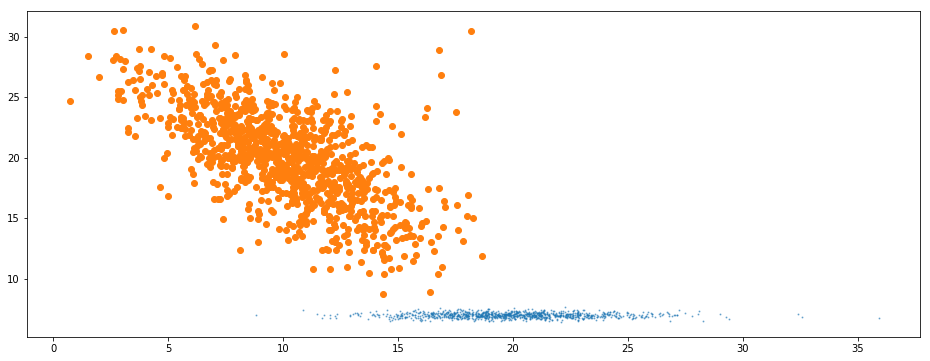

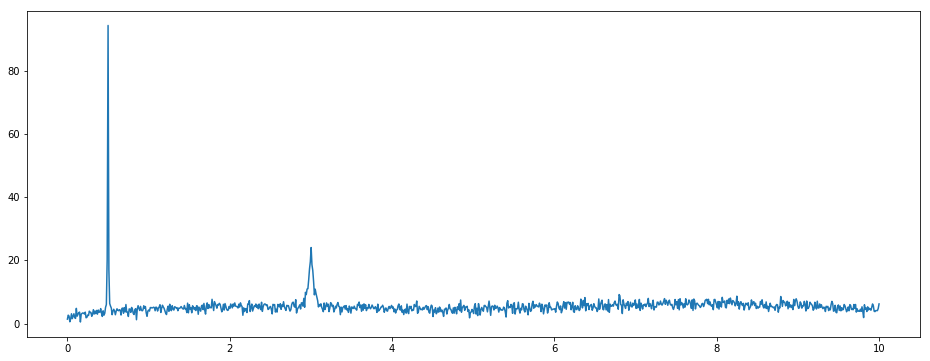

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

d1 = np.loadtxt("../data/outliers/outlier_1d.txt")
d2 = np.loadtxt("../data/outliers/outlier_2d.txt")
d3 = np.loadtxt("../data/outliers/outlier_curve.txt")
print(d1.shape, d2.shape)

plt.figure(figsize=(16, 6))
plt.scatter(d1, np.random.normal(7, 0.2, size=d1.size), s=1, alpha=0.5)
plt.scatter(d2[:, 0], d2[:, 1])
plt.show()
plt.figure(figsize=(16, 6))
plt.plot(d3[:, 0], d3[:, 1])

# Basics
The most basic and most common way of manually doing outlier pruning on data distribution is to:  
1. model your data as some analytic distribution
2. find all points below a certain probability 
3. remove them 
4. refit the distribution, and potentially run again from step 1

rejection -1006 points
z_score of 3 correspondents to a prob of 0.27%


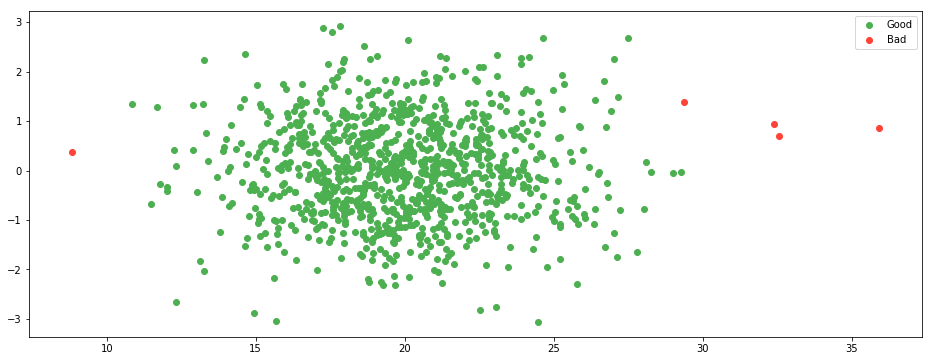

In [10]:
mean, std = np.mean(d1), np.std(d1)
z_score = np.abs((d1-mean)/std)
threshold = 3 
good = z_score < threshold

print(f"rejection {~(good.sum())} points")
from scipy.stats import norm
print(f"z_score of 3 correspondents to a prob of {100*2*norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=d1.size)
plt.figure(figsize=(16, 6))
plt.scatter(d1[good], visual_scatter[good], label="Good", color="#4CAF50")
plt.scatter(d1[~good], visual_scatter[~good], label="Bad", color="#FF4336")
plt.legend()

z_score is a good metric for one dimensional data

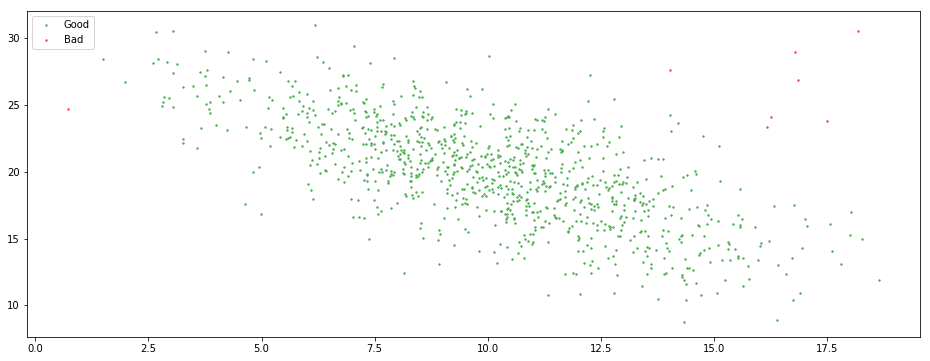

In [14]:
from scipy.stats import multivariate_normal as mn 

mean, cov = np.mean(d2, axis=0), np.cov(d2.T)
good = mn(mean, cov).pdf(d2) > 0.01/100 

plt.figure(figsize=(16, 6))
plt.scatter(d2[good, 0], d2[good, 1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good, 1], s=2, label="Bad", color="#FF4336")
plt.legend()

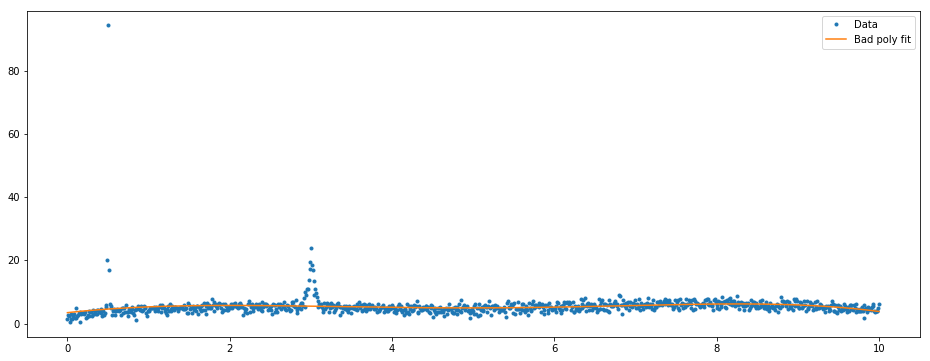

In [16]:
xs, ys = d3.T 
p = np.polyfit(xs, ys, deg=5)
ps = np.polyval(p, xs)
plt.figure(figsize=(16, 6))
plt.plot(xs, ys, ".", label="Data")
plt.plot(xs, ps, label="Bad poly fit")
plt.legend()

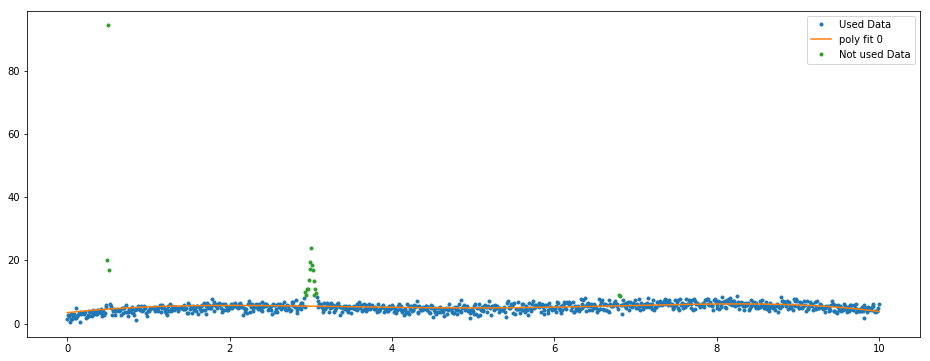

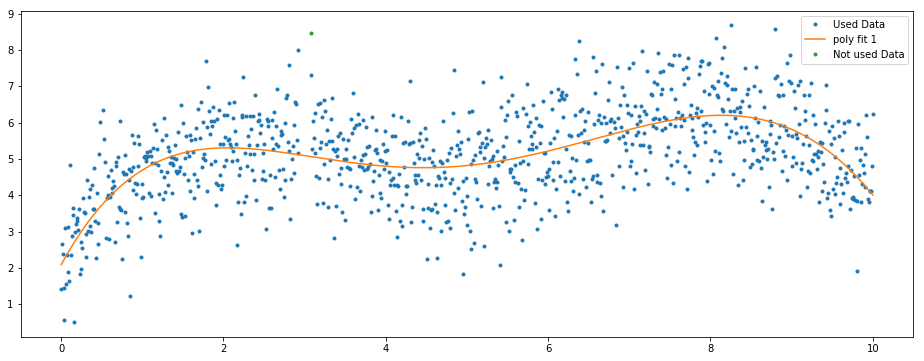

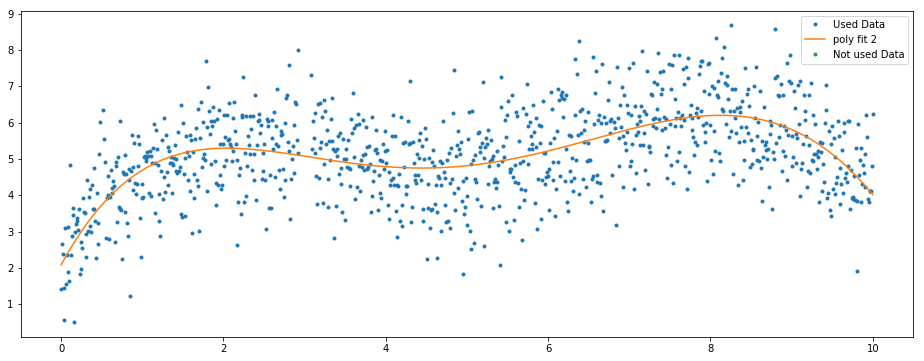

In [17]:
x, y = xs.copy(), ys.copy()
for i in range(5):
    p = np.polyfit(x, y, deg=5)
    ps = np.polyval(p, x)
    good = y-ps<3 # only remove positive outliers
    
    x_bad, y_bad = x[~good], y[~good]
    x, y = x[good], y[good]
    
    plt.figure(figsize=(16, 6))
    plt.plot(x, y, ".", label="Used Data")
    plt.plot(x, np.polyval(p, x), label=f"poly fit {i}")
    plt.plot(x_bad, y_bad, ".", label="Not used Data")
    plt.legend()
    plt.show()
    
    if (~good).sum() == 0:
        break

# Automating it
Blessed **[sklearn](https://scikit-learn.org/stable/modules/outlier_detection.html)** to the rescue. **Local outlier finder (LOF)** is great - it uses the distance from one point to its closest neighbors to figure out point density and removes those in low density region.

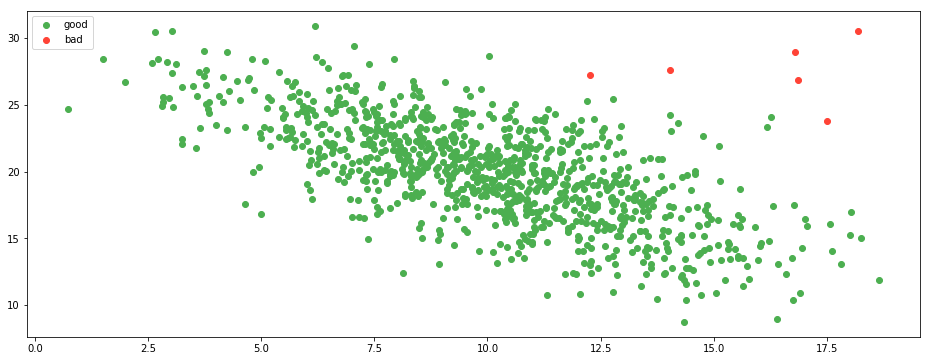

In [19]:
from sklearn.neighbors import LocalOutlierFactor 
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.005)
good = lof.fit_predict(d2) > 0.5 
plt.figure(figsize=(16, 6))
plt.scatter(d2[good, 0], d2[good, 1], label="good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good, 1], label="bad", color="#FF4336")
plt.legend()